### Importing the Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

## Part I

In [6]:
# Task 1 Load library and dataset

#from sklearn.naive_bayes import GaussianNB

myiris = pd.read_excel('Iris.xlsx') 

print("data summary")
print(myiris.describe())

#Identify predictors and target
predictors = myiris.drop("class",axis=1)
target = myiris['class']

data summary
        sepal_len   sepal_wid   petal_len   petal_wid       class
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667    1.000000
std      0.828066    0.433594    1.764420    0.763161    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


### Visualization

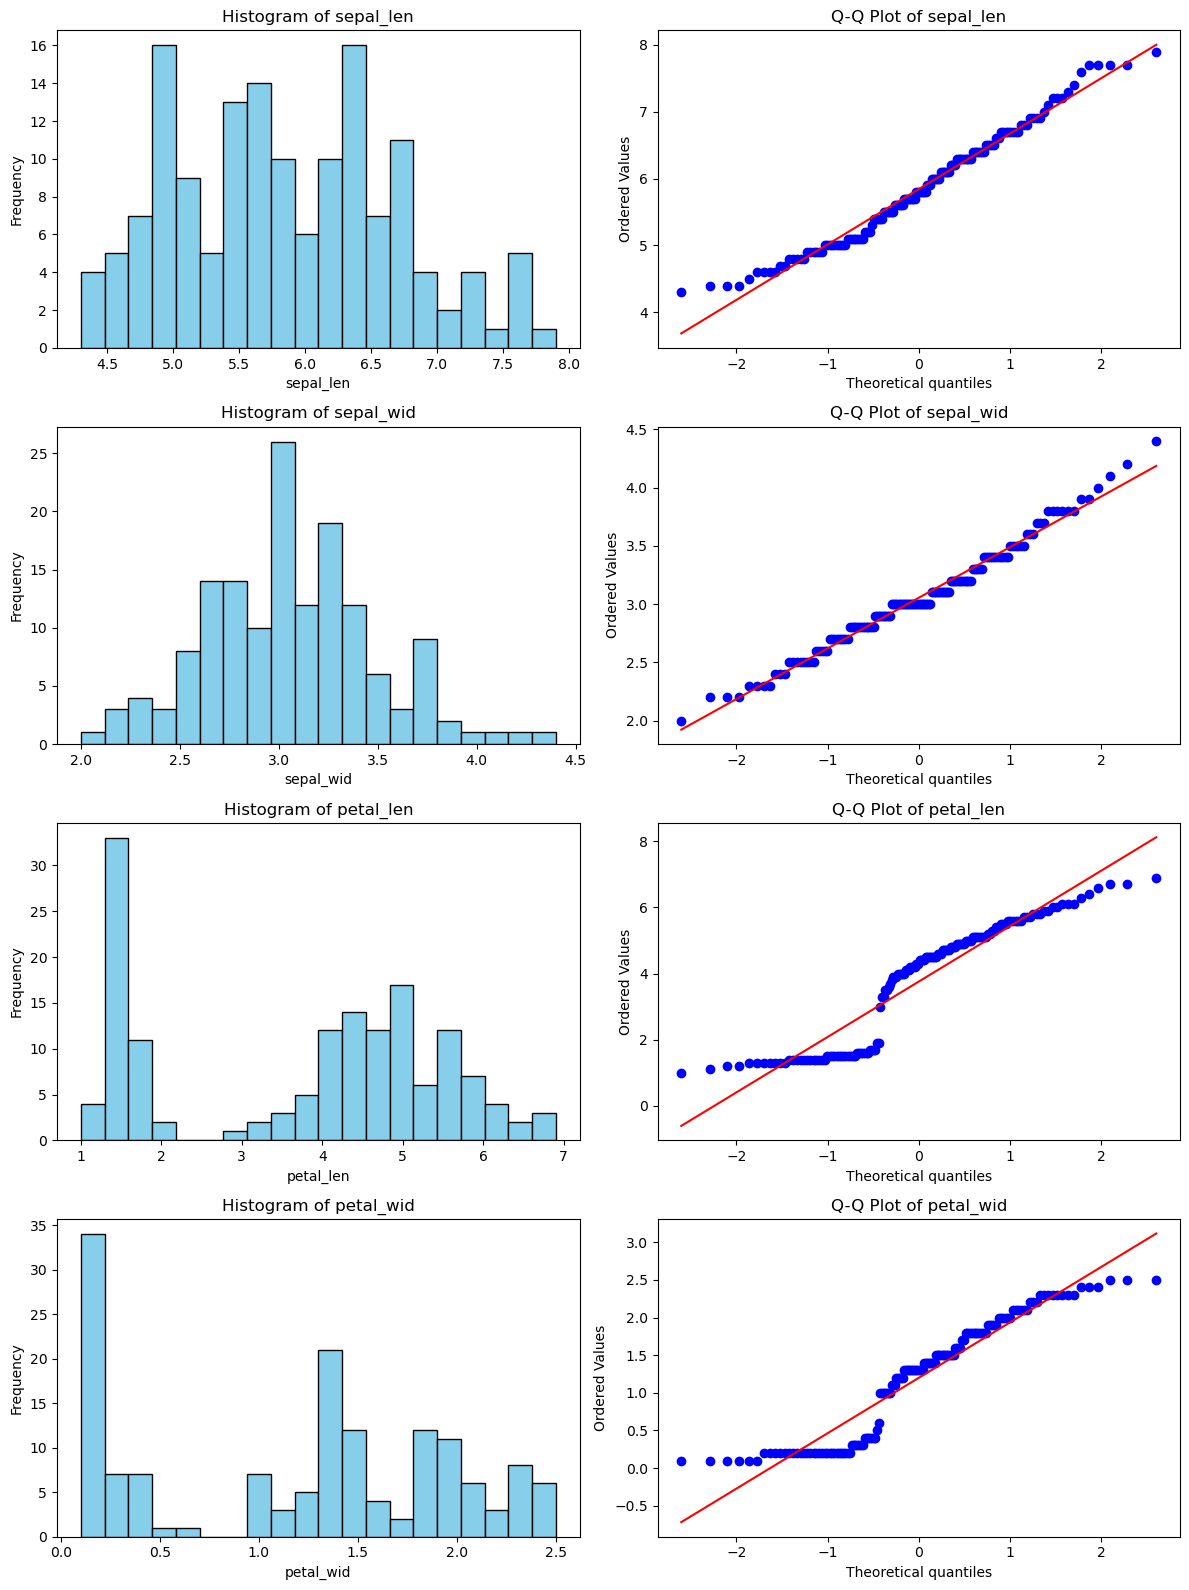

In [7]:
# Task 2 Visualize the distribution of the input variables within the subset of your dataset

# Prepare the plot grid
fig, axs = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows for histograms and Q-Q plots of 4 features

# Loop over each feature to create a histogram and a Q-Q plot
for index, feature in enumerate(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']):
    # Histogram
    axs[index, 0].hist(myiris[feature], bins=20, color='skyblue', edgecolor='black')
    axs[index, 0].set_title(f'Histogram of {feature}')
    axs[index, 0].set_xlabel(f'{feature}')
    axs[index, 0].set_ylabel('Frequency')

    # Q-Q plot
    stats.probplot(myiris[feature], dist="norm", plot=axs[index, 1])
    axs[index, 1].set_title(f'Q-Q Plot of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Data Preprocessing

In [11]:
# Task 3.1: By using k-fold cross-validation, split your dataset into training and testing (33%) subset.

# Setup for 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### Fitting Model

In [12]:
# Task 4: Fit a Gaussian Naive Bayes model

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# To store the accuracies from each fold
accuracies = []

# Execute the k-fold cross-validation
for train_index, test_index in kf.split(predictors):
    # Correctly index the rows for training and testing data using .iloc for DataFrames
    pred_train, pred_test = predictors.iloc[train_index], predictors.iloc[test_index]
    tar_train, tar_test = target.iloc[train_index], target.iloc[test_index]

    # Training the model
    gnb.fit(pred_train, tar_train)

    # Predicting the labels
    tar_pred = gnb.predict(pred_test)

    # Calculating accuracy
    accuracy = accuracy_score(tar_test, tar_pred)
    accuracies.append(accuracy)

# Calculating the average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2%}')

# Optionally, print accuracy for each fold
for fold, acc in enumerate(accuracies, 1):
    print(f'Fold {fold}: Accuracy = {acc:.2%}')

Average Accuracy: 96.00%
Fold 1: Accuracy = 100.00%
Fold 2: Accuracy = 100.00%
Fold 3: Accuracy = 100.00%
Fold 4: Accuracy = 93.33%
Fold 5: Accuracy = 100.00%
Fold 6: Accuracy = 86.67%
Fold 7: Accuracy = 93.33%
Fold 8: Accuracy = 100.00%
Fold 9: Accuracy = 100.00%
Fold 10: Accuracy = 86.67%


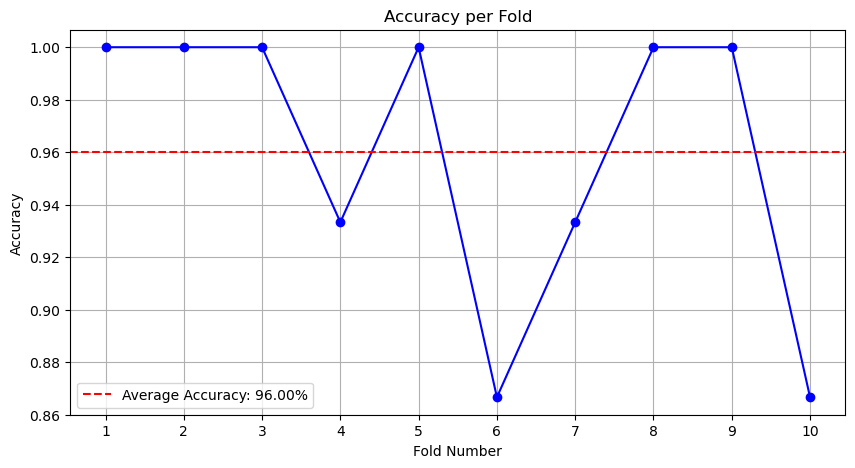

In [13]:
# Task 3.2: Try to change your proportion to 20% for test sets. Explain your findings.

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Ensure ticks correspond to fold numbers
plt.grid(True)

# Highlight the average accuracy
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2%}')
plt.legend()

plt.show()

### Model Evaluation

In [14]:
tar_pred = gnb.predict(pred_test)

Text(50.722222222222214, 0.5, 'True Labels')

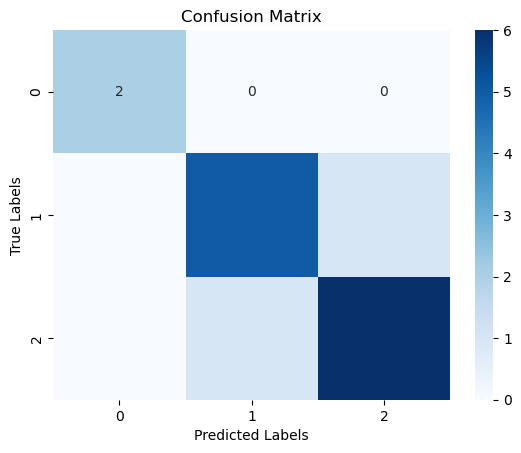

In [15]:
# Task 5.1. Generate the confusion matrix for your model and provide matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(tar_test, tar_pred)

# Optionally, you can visualize the confusion matrix with seaborn
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [16]:
# Task 5.2: Using the classification report, provide the performance metrics of the model.

# Evaluating the model
accuracy = accuracy_score(tar_test, tar_pred)
report = classification_report(tar_test, tar_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      0.83      0.83         6
           2       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.90      0.90      0.90        15
weighted avg       0.87      0.87      0.87        15

